In [42]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Define parameters
Fo = 0.5
nx = 500
nt = 10000
m_per_km = 1000
L = 100*m_per_km
mm_per_m = 1000
kappa = 1./mm_per_m/mm_per_m # thermal diffusivity 1 mm^2/s converted to m^2/s
T_hot = 1600
T_ocean = 0.

# Define domain and create Temperature array, and set timesteps
dx = nx/L
dt = Fo*dx**2 / kappa
x = np.arange(nx)*dx*m_per_km
secs_per_year = 60*60*24*365
t = np.arange(nt)*dt*secs_per_year
T = np.zeros([nt, nx])

# Set initial condition
T[0,:] = T_hot
# Set boundary conditions
T[:,0] = T_ocean
T[:,-1] = T_hot

# Solve for temperature in loop
for n in np.arange(nt-1):
    T[n+1,1:-1] = Fo*T[n,2:] + (1 - 2*Fo)*T[n,1:-1] + Fo*T[n,0:-2]

# Calculate analytical solution
def T_ana(n):
    j = np.arange(nx)
    return T_ocean + (T_hot - T_ocean)*erf(0.5*np.sqrt(j**2/(Fo*n)))

In [5]:
import matplotlib.pyplot as plt

def plot_T_profile(n):
    plt.plot(x, T[n,:])
    plt.plot(x, T_ana(n), '--')
    plt.xlabel('Depth (km)')
    plt.ylabel('Temperature (C)')

In [6]:
plot_T_profile(25)
plot_T_profile(50)
plot_T_profile(75)
plot_T_profile(95)


NameError: name 'x' is not defined

In [12]:
isotherm_idx = len(T[50,T[50]<1200]) - 1
x[isotherm_idx]

In [45]:
crust_thickness = np.zeros(nt)
for n in np.arange(nt):
    isotherm_idx = len(T[n,T[n]<1200]) - 1
    crust_thickness[n] = x[isotherm_idx]

Text(0, 0.5, 'Crust thickness (km)')

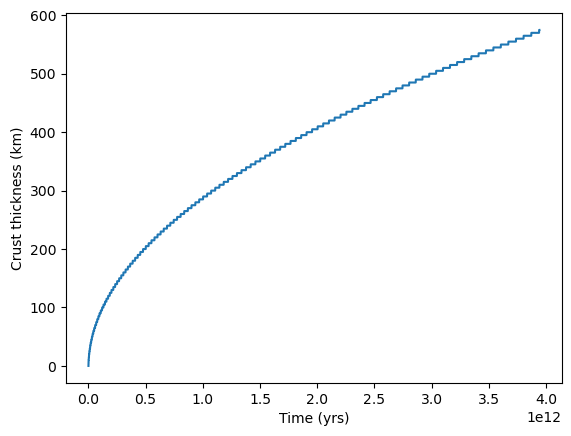

In [46]:
plt.plot(t, crust_thickness)
plt.xlabel('Time (yrs)')
plt.ylabel('Crust thickness (km)')

Text(0, 0.5, 'Temperature (C)')

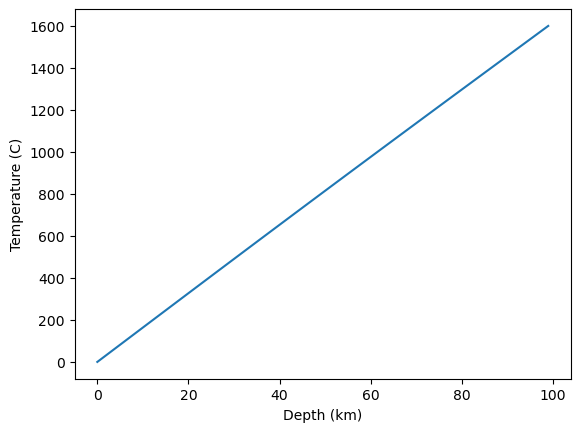

In [7]:
from heat_equation import solve_T
import matplotlib.pyplot as plt


sol = solve_T(nt=10000)
T = sol['T']
T_ana = sol['T_ana']
x = sol['x']
t = sol['t']
plt.plot(x, T[-1,:])
plt.xlabel('Depth (km)')
plt.ylabel('Temperature (C)')

Text(0, 0.5, 'Temperature (C)')

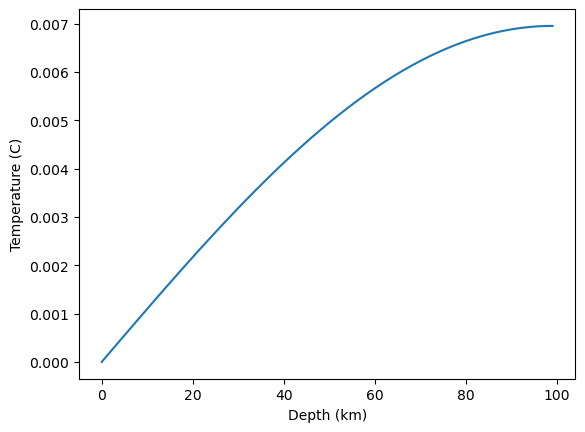

In [8]:
sol = solve_T(nt=100000, insulated_lower_bnd=True)
T = sol['T']
T_ana = sol['T_ana']
x = sol['x']
t = sol['t']
plt.plot(x, T[-1,:])
plt.xlabel('Depth (km)')
plt.ylabel('Temperature (C)')

In [1]:
import numpy as np

In [6]:
n=25
Fo = 0.5

A_upper = -Fo*np.ones(n-2)
A_upper[0] = 0
A_mid = (1+2*Fo)*np.ones(n-2)
A_lower = -Fo*np.ones(n-2)
A_lower[-1] = 0

A = np.vstack((A_upper, A_mid, A_lower))
A


array([[ 0. , -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5],
       [ 2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,
         2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,  2. ,
         2. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5,
         0. ]])

(0.0, 1600.0)

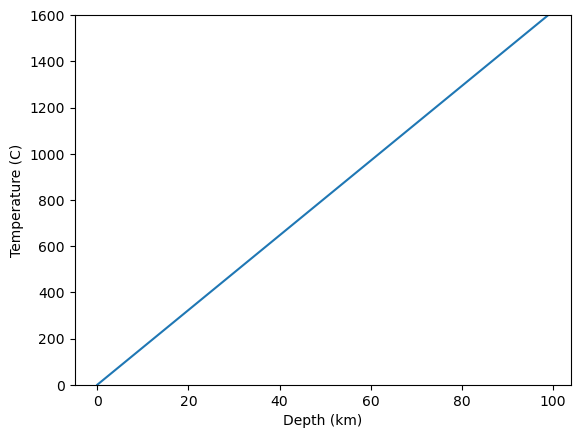

In [11]:
from heat_equation import solve_T
import matplotlib.pyplot as plt

Fo=200
# implicit
sol = solve_T(nt=100, implicit=True, Fo=Fo)
T = sol['T']
T_ana = sol['T_ana']
x = sol['x']
t = sol['t']
plt.plot(x, T[-1,:])
#plt.plot(x, T_ana[-1,:], ':')

#explicit
sol = solve_T(nt=1000, implicit=False, Fo=Fo)
T_exp = sol['T']
T_ana = sol['T_ana']
x = sol['x']
t = sol['t']
plt.plot(x, T_exp[-1,:], '--')

plt.xlabel('Depth (km)')
plt.ylabel('Temperature (C)')
plt.ylim([0,1600])